-  Regularized regression to reduce amount of features
-  NLP on smaller text columns
-  OHE description for if customer filled out

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling as pdp
import matplotlib as mpl
mpl.rcParams['font.size'] = 15.0
%matplotlib inline
import imp
plt.style.use('seaborn-darkgrid')
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBRFClassifier,XGBRFClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit, GridSearchCV, train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from numpy.linalg import svd
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA, NMF
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from nltk import word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from yellowbrick.cluster import KElbowVisualizer
from os import listdir

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/adamricks/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/adamricks/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/adamricks/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [105]:
import src.LC_Clean_Assist as LCC
import src.LC_Plotter as LCP
imp.reload(LCP)
imp.reload(LCC)

<module 'src.LC_Clean_Assist' from '/Users/adamricks/Documents/Galvanize/Capstone2/lending-club/src/LC_Clean_Assist.py'>

In [3]:
df = pd.read_csv('data/LC_Compiled.csv',low_memory=False);

In [4]:
df = LCC.clean_lc_for_plotting(df)

In [5]:
df = LCC.clean_lc_for_models(df);

/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/Users/adamricks/Documents/Galvanize/Capstone2/lending-club/src/LC_Clean_Assist.py:62: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/Users/adamricks/Documents/Galvanize/Capstone2/lending-club/src/LC_Clean_Assist.py:64: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

In [6]:
print(df.shape)
print(df.info())

(1570068, 27)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1570068 entries, 0 to 2507515
Data columns (total 27 columns):
issue_d_year         1570068 non-null int64
grade                1570068 non-null object
sub_grade            1570068 non-null object
funded_amnt          1570068 non-null float64
term                 1570068 non-null int64
int_rate             1570068 non-null float64
installment          1570068 non-null float64
purpose              1570068 non-null object
application_type     1570068 non-null object
FICO                 1570068 non-null float64
DTI                  1570068 non-null float64
annual_income        1570068 non-null float64
emp_length           1570068 non-null int64
home_ownership       1570068 non-null object
addr_state           1570068 non-null object
earliest_cr_line     1570068 non-null int64
negative_activity    1570068 non-null float64
inq_last_6mths       1570068 non-null float64
delinq_2yrs          1570068 non-null float64
verified     

In [7]:
df.to_csv('data/cleaned_data.csv',index=False)

In [8]:
df=pd.read_csv('data/cleaned_data.csv')

In [107]:
returns = LCP.lc_returns(df)

AttributeError: 'AxesSubplot' object has no attribute 'barplot'

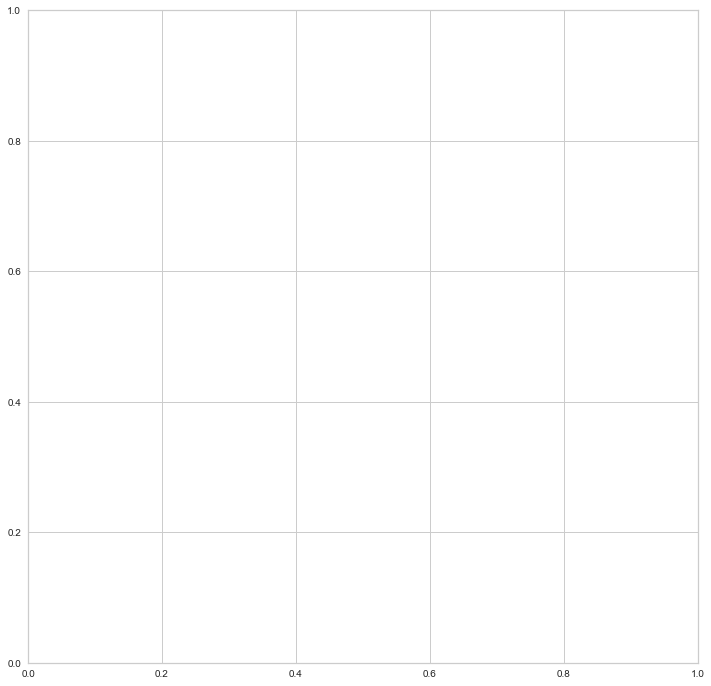

In [110]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(1,1,1)
ax.barplot(returns['return'])